In [1]:
import wandb
import numpy  as np
import pandas as pd
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
from sklearn.metrics import confusion_matrix
import copy

In [2]:
wandb.login()

In [3]:
'''LOADING TRAIN AND TEST DATA SET'''
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

In [4]:
print(f'Shape of input train data is : {X_train.shape}')
print(f'Shape of input test data is : {X_test.shape}')
print(f'Shape of output train data is : {Y_train.shape}')
print(f'Shape of output test data is : {Y_test.shape}')

Shape of input train data is : (60000, 28, 28)
Shape of input test data is : (10000, 28, 28)
Shape of output train data is : (60000,)
Shape of output test data is : (10000,)


In [5]:
'''Finding image of each category'''
categories=[]
images_list=[]
attributes={0:'T-shirt',1:'Trouser',2:'Pullover',3:'Skirt',4:'Overcoat',5:'Sandal',
            6:'Shirt',7:'Sneakers',8:'Bag',9:'Ankle boot'}
title=list(attributes.values())
print(f'The various categorical variables in the data are : {title}')
for i in range(10):
    categories.append(i)
for i in range(Y_train.shape[0]):
               if Y_train[i]==categories[0]:
                    images_list.append(X_train[i])
                    del(categories[0])
                    if len(categories)==0:
                        break


The various categorical variables in the data are : ['T-shirt', 'Trouser', 'Pullover', 'Skirt', 'Overcoat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']


Numerical value equivalent to categorical variable : 9


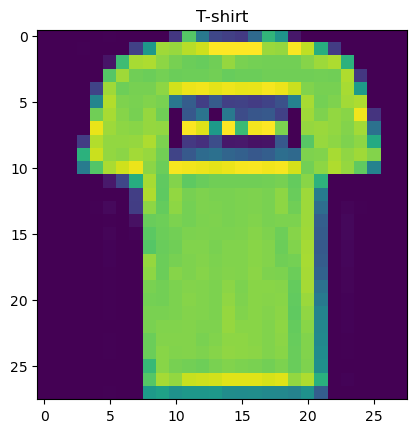

Numerical value equivalent to categorical variable : 0


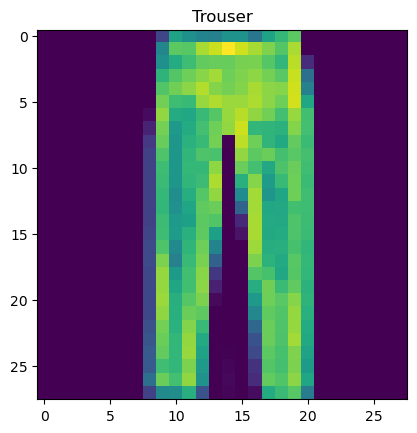

Numerical value equivalent to categorical variable : 0


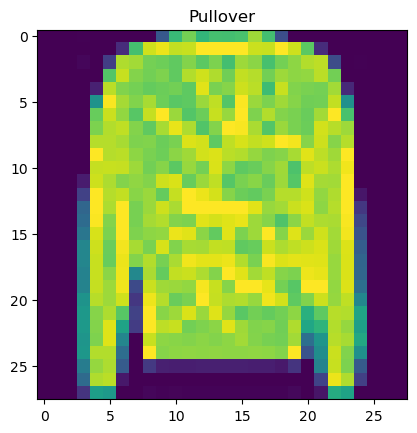

Numerical value equivalent to categorical variable : 3


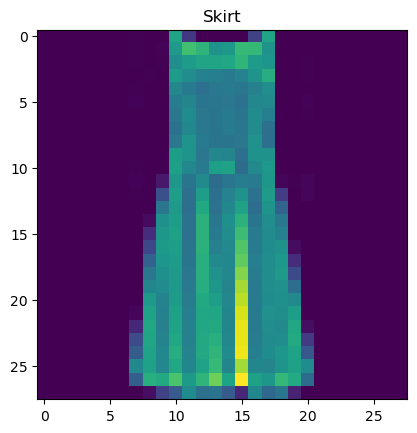

Numerical value equivalent to categorical variable : 0


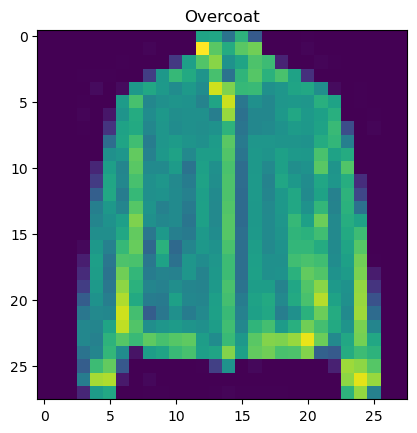

Numerical value equivalent to categorical variable : 2


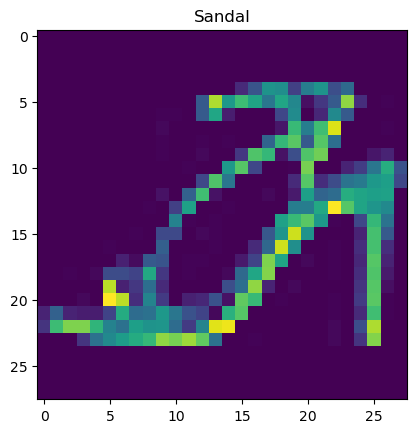

Numerical value equivalent to categorical variable : 7


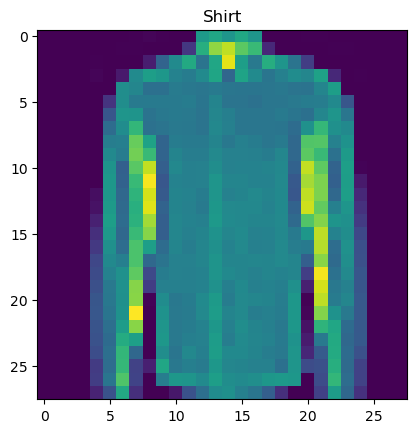

Numerical value equivalent to categorical variable : 2


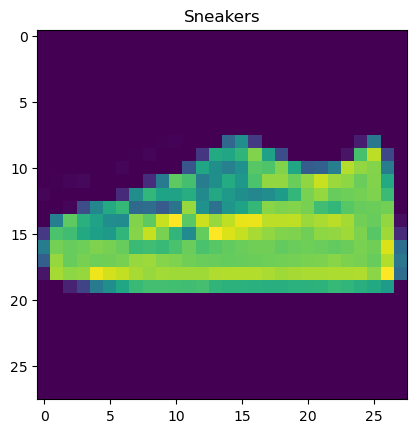

Numerical value equivalent to categorical variable : 5


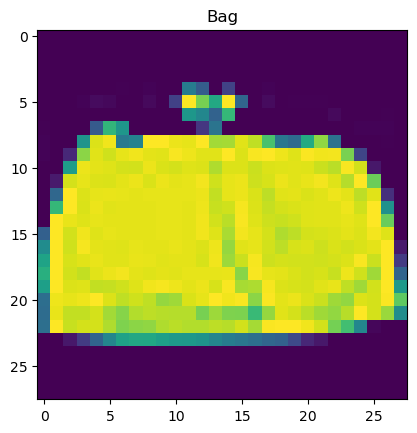

Numerical value equivalent to categorical variable : 5


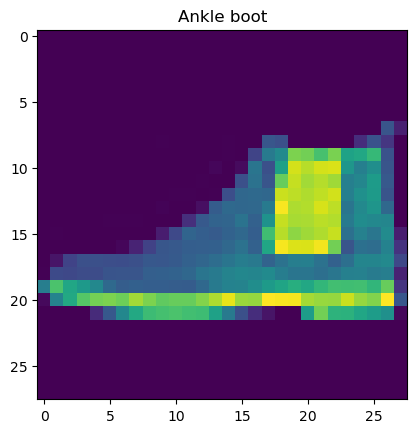

In [6]:
'''Plotting image of each category'''
for i in range(len(attributes)):
    print(f'Numerical value equivalent to categorical variable : {Y_train[i]}')
    plt.imshow(images_list[i], cmap=plt.get_cmap())
    plt.title(attributes[i])
    plt.show()

In [ ]:
wandb.init(project="CS6910_DL_ASS1", name='Assignment_1_sample_imgs')
'''Displaying sample images in wandb'''
wandb.log({"Sample Image from each class": [wandb.Image(image, caption=caption) for image, 
                                            caption in zip(images_list,title)]})

In [7]:
'''CHANGING THE SHAPE OF INPUT DATA'''
x_train=np.zeros((60000,784))
for i in range(X_train.shape[0]):
    a=X_train[i].reshape(1,784)
    x_train[i]=a
print('Train data',x_train.shape)
x_test=np.zeros((10000,784))
for i in range(X_test.shape[0]):
    a=X_test[i].reshape(1,784)
    x_test[i]=a
print('Test data',x_test.shape)

Train data (60000, 784)
Test data (10000, 784)


In [8]:
'''CONVERTING OUTPUT DATA INTO ONE HOT VECTOR FORM'''
a = np.max(Y_train)+1
y_train=np.zeros((Y_train.shape[0],a))
for i in range(Y_train.shape[0]):
    for j in range(a):
        if Y_train[i]==j:
            y_train[i,j]=1
print('Train data',y_train.shape)
y_test=np.zeros((Y_test.shape[0],a))
for i in range(Y_test.shape[0]):
    for j in range(a):
        if Y_test[i]==j:
            y_test[i,j]=1
#print(y_test[0,:])
print('Test data',y_test.shape)

Train data (60000, 10)
Test data (10000, 10)


In [9]:
'''CREATING VALIDATION DATA SET'''
'''The input data is split into train and validation data where validation comprises of 10% of the data.'''

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.10,random_state=10)
x_train=x_train.T/255
y_train=y_train.T
x_test=x_test.T/255
y_test=y_test.T
x_val=x_val.T/255
y_val=y_val.T
print(f'The shape of train data is:{x_train.shape}')
print(f'The shape of test data is:{x_test.shape}')
print(f'The shape of validation data is:{x_val.shape}')

The shape of train data is:(784, 54000)
The shape of test data is:(784, 10000)
The shape of validation data is:(784, 6000)


In [10]:
'''ACTIVATION FUNCTIONS'''

'''input: zl = w(l)*a(l-1) + b(l) where l is the lth Layer.The various activation functions implemented here are 
sigmoid,tanh,ReLu and Identity functions.'''


#SIGMOID FUNCTION
def sigmoid_function(z):
    h=1./(1.+np.exp(-z))
    
    return h

#TANH FUNCTION
def tanh_function(z):
    h=np.tanh(z)
    
    return h

#RELU FUNCTION
def relu_function(z):
    h=np.maximum(z,0)
    
    return h
    

#IDENTITY FUNCTION
def identity_function(z):
    
    return z


In [11]:
#OUTPUT LAYER FUNCTION
'''The given problem is a multi-class classification problem.So,we use softmax function for the output layer(L)
    Z(L) = W(L)*A(L-1) + B(L) where Lth layer is the output layer.'''


#SOFTMAX FUNCTION
'''OUTPUT LAYER FUNCTION'''

def softmax_function(z):
    #z=z-np.max(z,axis=0,keepdims=True) # to avoid Nan or division by zero errors
    h = np.exp(z)/np.sum(np.exp(z), axis=0)
    return h

In [12]:
'''DERIVATIVE FUNCTIONS'''

'''These are the derivatives of the corresponding activation functions, which is used in backpropagation to find
the derivative of activation functions.'''

#DERIVATIVE OF SIGMOID FUNCTION
def sigmoid_function_dash(z):
    h = sigmoid_function(z)
    
    return h*(1-h)


#DERIVATIVE OF TANH FUNCTION
def tanh_function_dash(z):
    h=tanh_function(z)
    
    return 1-(h)**2


#DERIVATIVE OF RELU FUNCTION
def relu_function_dash(z):
    return 1*(z>0)
    
#DERIVATIVE OF IDENTITY FUNCTION
def identity_function_dash(z):
    h = identity_function(z)
    
    return np.ones(z.shape)



In [13]:
'''SOFTMAX DERIVATIVE'''
def softmax_dash(Z):
    h= softmax(z) * (1-softmax(z))
    return h

In [14]:
#CROSS ENTROPY FUNCTION(DERIVATIVE OF OUTPUT LAYER)
def cross_entropy_function(y,ycap,w,lambd):
    '''This function is called as categorical cross entropy function.
       input: Y:actual value of output
              YCAP:predicted value of output
              lambd:Regularisation parameter(L2 Rregularization is used here)'''
    
    #ycap = np.clip(ycap, 1e-12, 1.0 - 1e-12) #to avoid Nan error 
    m=y.shape[1]
    cost=-(1/m)*np.sum(y*np.log(ycap))
    regularization_cost=0
    for i in range(len(w)):
        regularization_cost += (lambd/(2*m))*np.sum(np.square(w[i]))
        
    return cost+regularization_cost
     
        
#MEAN SQUARED ERROR FUNCTION
def mean_squared_error_function(y,ycap,w,lambd):
    '''input: Y:actual value of output
              YCAP:predicted value of output
              lambd:Regularisation parameter(L2 Rregularization is used here)'''   
    ycap = np.clip(ycap, 1e-12, 1.0 - 1e-12)
    m = y.shape[1]
    mean_square_error = (1/m)*np.sum((y-ycap)**2)
    reg_cost=0
    for i in range(len(w)):
        reg_cost += (lambd/(2*m))*np.sum(w[i]**2)
    return mean_square_error + reg_cost


In [15]:
#INITIALISE PARAMETERS

'''input:  Layer_attributes is a list consisting of number of 
    neurons in each layer. Here,input layer is considered as 0th Layer, output layer is considered as Lth layer
    and the layers from 1 to (L-1) are considered as hidden layers.Therefore, layer-attributes consists of (L+1)
    values. The methods used here to initialise the values of parameters are Random and Xavier Initialisations.'''

def random_initialization(layer_attributes):
    
    L=len(layer_attributes)-1
    W=[]
    B=[]
    np.random.seed(10)
    for i in range(1,L+1):
        weight_i = np.random.uniform(-1,1,(layer_attributes[i],layer_attributes[i-1]))
        bias_i=np.zeros((layer_attributes[i],1))
        #bias_i=np.full((layer_attributes[i],1),0.01) # in case of relu function to avoid vanishing gradient
        W.append(weight_i)
        B.append(bias_i)
        
    return W,B

def xavier_initialization(layer_attributes):
    
    L=len(layer_attributes)-1
    W=[]
    B=[]
    for i in range(1,L+1):
        lim = np.sqrt(6/(i+(i-1)))
        weight_i = np.random.uniform(-lim,lim,(layer_attributes[i],layer_attributes[i-1]))
        bias_i=np.zeros((layer_attributes[i],1))
        W.append(weight_i)
        B.append(bias_i)
        
    return W,B
        

In [16]:
#FORWARD PROPAGATION
def forward_propagation(x,w,b,activation='sigmoid_function'):
    
    '''Forward propagation is used to find the predicted value of output and cost function by going forward,starting from 
    input layer until the output layer.We calculate the pre-activation and activation values and returns the latter after each
    layer. The input parameters taken are input data set,weights and bias value, and activation function to be used where the 
    default is set as sigmoid function. Softmax function is used to find the values at the output layer.
    Here,z is the linear part and a is the non-linear part(activation function) of a neuron.'''
    A=[]
    Z=[]
    length=len(w)
    #Hidden layers
    A.append(x)
    for i in range(length-1):
        z_i=np.dot(w[i],A[-1])+b[i]
        Z.append(z_i)
        if activation =='sigmoid_function':
            a_i = sigmoid_function(z_i)
            A.append(a_i)
        elif activation=='tanh_function':
            a_i = tanh_function(z_i)
            A.append(a_i)
        elif activation == 'relu_function':
            a_i = relu_function(z_i)
            A.append(a_i)
        elif activation == 'identity_function':
            a_i = identity_function(z_i)
            A.append(a_i)
    #output layer
    z_l = np.dot(w[-1],A[-1]) + b[-1]
    a_l = softmax_function(z_l)
    A.append(a_l)
    Z.append(z_l)

    return Z,A


In [17]:
#BACK PROPAGATION
def back_propagation(A,y,W,B,Z,lambd,activation='sigmoid_function',loss='cross_entropy_function'):
    
    '''Back propagation is used to find the derivatives of each weights and biases at each layers by starting 
    from the output layer and travelling backwards.We find the derivatives wrto ouput layer,wrto hidden layer and eventually
    wrto weights and biases;dw=dJ/dw,db=dJ/db,dz=dJ/dz.'''
    m=y.shape[1]
    L=len(W)
    dW=[]
    dB=[]
    dZ=[]
    #Output Layer
    if loss=='cross_entropy_function':
        dZ.append(A[-1]-y)
        dB.append((1/m)*np.sum(dZ[-1],axis=1,keepdims=True))
        dW.append((1/m)*(np.dot(dZ[-1],A[-2].T))+(lambd/m)*W[-1])
    elif loss=='mean_squared_error_function':
        dZ.append((A[-1]-y)*A[-1]*(1-A[-1]))
        dB.append((1/m)*np.sum(dZ[-1],axis=1,keepdims=True))
        dW.append((1/m)*(np.dot(dZ[-1],A[-2].T))+(lambd/m)*W[-1])
        
   
    #Hidden layers
    l=L-1
    while l >0:
        if activation=='sigmoid_function':
            dz_l = (1/m)*np.dot(W[l].T,dZ[-1])*sigmoid_function_dash(A[l])
            db_l = (1/m)*np.sum(dz_l,axis=1,keepdims=True)
            dw_l = (1/m)*np.dot(dz_l,A[l-1].T) + (lambd/m)*W[l-1]
            dW.append(dw_l)
            dB.append(db_l)
            dZ.append(dz_l)
        
        elif activation == 'relu_function':
            dz_l = (1/m)*np.dot(W[l].T,dZ[-1])*relu_function_dash(A[l])
            db_l = (1/m)*np.sum(dz_l,axis=1,keepdims=True)
            dw_l = (1/m)*np.dot(dz_l,A[l-1].T) + (lambd/m)*W[l-1]
            dW.append(dw_l)
            dB.append(db_l)
            dZ.append(dz_l)
            
        elif activation=='tanh_function':
            dz_l = (1/m)*np.dot(W[l].T,dZ[-1])*tanh_function_dash(A[l])
            db_l = (1/m)*np.sum(dz_l,axis=1,keepdims=True)
            dw_l = (1/m)*np.dot(dz_l,A[l-1].T) + (lambd/m)*W[l-1]
            dW.append(dw_l)
            dB.append(db_l)
            dZ.append(dz_l)
            
        elif activation=='identity_function':
            dz_l = (1/m)*np.dot(W[l].T,dZ[-1])*identity_function_dash(A[l])
            db_l = (1/m)*np.sum(dz_l,axis=1,keepdims=True)
            dw_l = (1/m)*np.dot(dz_l,A[l-1].T) + (lambd/m)*W[l-1]
            dW.append(dw_l)
            dB.append(db_l)
            dZ.append(dz_l)
            
        l=l-1
            
    return dZ[::-1],dW[::-1],dB[::-1]

In [18]:
#OPTIMIZERS
def gradient_descent(W,B,dW,dB,learning_rate):
    
    '''Mini batch,vanilla and stochastic gradient descents can be performed for this basic 
    gradient descent variant.'''
    
    alpha=learning_rate
    length=len(W)
    for i in range(length):
        W[i] = W[i] - alpha*dW[i]
        B[i] = B[i] - alpha*dB[i]
    return W,B

def momentum_gradient_descent(w,b,dw,db,learning_rate,momentum,update_w,update_b):
    
    '''Nesterov accelarated gradient descent can also be implemented as a special case of this Momentum gradient
    descent  where we find wlookahead before calculating gradients '''
    
    for i in range(len(w)):  
        update_w[i] = (momentum*update_w[i]) + dw[i]
        update_b[i] = (momentum*update_b[i]) + db[i]
        w[i] = w[i] - (learning_rate*update_w[i])
        b[i] = b[i] - (learning_rate*update_b[i])
    return w,b,update_w,update_b

def rms_prop(w,b,dw,db,learning_rate,beta,epsilon,v_t_w,v_t_b):
    
    '''RMSProp is an adaptive learning algorithm and the hyperparamteters used 
    here are learning_rate(alpha) and beta.'''
    
    for i in range(len(w)):
        v_t_w[i] = beta*v_t_w[i] + (1-beta)*((dw[i])**2)
        v_t_b[i] = beta*v_t_b[i] + (1-beta)*((db[i])**2)
        w[i] = w[i] - (learning_rate/(np.sqrt(v_t_w[i]+epsilon)))*dw[i]
        b[i] = b[i] - (learning_rate/(np.sqrt(v_t_b[i]+epsilon)))*db[i]
        return w,b,v_t_w,v_t_b


def adam(w,b,dw,db,learning_rate,beta1,beta2,epsilon,m_w,m_b,v_w,v_b,t):
    
    '''Adam(Adaptive moments) is one of the widely used adaptive learning gradient descent variant and it takes 
    beta1,beta2,learning_rate(alpha) as hyperparameters and also a small value epsilon to avoid zero division
    errors.'''
    
    m_w_cap=[]
    m_b_cap=[]
    v_w_cap=[]
    v_b_cap=[]
    for k in range(len(w)):
        upd_w=np.zeros((w[k].shape))
        upd_b=np.zeros((b[k].shape))
        m_w_cap.append(upd_w)
        m_b_cap.append(upd_b)
        v_w_cap.append(upd_w)
        v_b_cap.append(upd_b)
        
    for i in range(len(w)):
        m_w[i]=beta1*m_w[i]+(1-beta1)*dw[i]
        m_b[i]=beta1*m_b[i]+(1-beta1)*db[i]
        v_w[i]=beta2*v_w[i]+(1-beta2)*(dw[i]**2)
        v_b[i]=beta2*v_b[i]+(1-beta2)*(db[i]**2)
        m_w_cap[i] = (1/(1-math.pow(beta1,t)))*m_w[i]
        m_b_cap[i] = (1/(1-math.pow(beta1,t)))*m_b[i]
        v_w_cap[i] = (1/(1-math.pow(beta2,t)))*v_w[i]
        v_b_cap[i] = (1/(1-math.pow(beta2,t)))*v_b[i]
        w[i] = w[i] - (learning_rate/(np.sqrt(v_w_cap[i]+epsilon)))*m_w_cap[i]
        b[i] = b[i] - (learning_rate/(np.sqrt(v_b_cap[i]+epsilon)))*m_b_cap[i]
        
    return w,b,m_w,m_b,v_w,v_b

def nadam(w,b,dw,db,learning_rate,beta1,beta2,epsilon,m_w,m_b,v_w,v_b,t):
    
    '''NAdam(Nesterov Adam) is the nesterov gradient variant of Adam'''
    
    m_w_cap=[]
    m_b_cap=[]
    v_w_cap=[]
    v_b_cap=[]
    for k in range(len(w)):
        upd_w=np.zeros((w[k].shape))
        upd_b=np.zeros((b[k].shape))
        m_w_cap.append(upd_w)
        m_b_cap.append(upd_b)
        v_w_cap.append(upd_w)
        v_b_cap.append(upd_b)
        
    for i in range(len(w)):
        
        m_w[i] = beta1*m_w[i] + (1-beta1)*dw[i]
        m_b[i] = beta1*m_b[i] + (1-beta1)*db[i]
        v_w[i] = beta2*v_w[i] + (1-beta2)*(dw[i])**2
        v_b[i] = beta2*v_b[i] + (1-beta2)*(db[i])**2
        m_w_cap[i] = (1/(1-beta1**t))*m_w[i]
        m_b_cap[i] = (1/(1-beta1**t))*m_b[i]
        v_w_cap[i] = (1/(1-beta2**t))*v_w[i]
        v_b_cap[i] = (1/(1-beta2**t))*v_b[i]
        w[i] = w[i]-(learning_rate/np.sqrt(v_w_cap[i]+epsilon))*(beta1*m_w_cap[i]+(1-beta1)*dw[i]/(1-beta1**t))
        b[i] = b[i]-(learning_rate/np.sqrt(v_b_cap[i]+epsilon))*(beta1*m_b_cap[i]+(1-beta1)*db[i]/(1-beta1**t))
        
    return w,b,m_w,m_b,v_w,v_b
        
                                

In [19]:
#ACCURACY
def accuracy(y,yout):
    '''Function to find the accuracy taking y and ypred as input and returns accracy value.'''
    yout=np.argmax(yout,axis=0)
    y = np.argmax(y,axis=0)   
    acc=np.mean(y==yout)*100
    return acc
    

In [20]:
#FUNCTION FOR PLOTS
def plot_error(j_train, j_val):
    plt.plot(list(range(len(j_train))), j_train, 'r', label="Train Loss")
    plt.plot(list(range(len(j_val))), j_val, 'lime', label="Validation Loss")
    plt.title("Training and Validation Loss vs No. of Epochs", size=16)
    plt.xlabel("No. of epochs", size=16)
    plt.ylabel("Loss", size=16)
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_accuracy(acc_train, acc_val):
    plt.plot(list(range(len(acc_train))), acc_train, 'r', label="Train Accuracy")
    plt.plot(list(range(len(acc_val))), acc_val, 'lime', label="Validation Accuracy")
    plt.title("Training and Validation Accuracy vs No. of Epochs", size=16)
    plt.xlabel("No. of epochs", size=16)
    plt.ylabel("Accuracy", size=16)
    plt.legend()
    plt.grid()
    plt.show()

In [1]:
 #PREDICT FUNCTION
def predict(x,y,w,b,lambd,activation='relu_function'):
    '''This function is to predict the cost and accuracy values of the test data
       input :  x(input)
                y(output)
                w,b(weights and biases)
                lambd(regularization parameter)
                loss(loss function)
                activation(activation function)'''
    
    z,a = forward_propagation(x,w,b,activation)
    cost_test = mean_squared_error(y,a[-1],w,lambd)
    acc= accuracy(y,a[-1])
            
    return acc,cost_test

In [24]:
# def neural_network(x_train,y_train,x_val,y_val,learning_rate = 0.1,momentum = 0.9,beta=0.9,beta1=0.9,beta2=0.99,epochs = 20,num_hidden_layers = 1,neurons=64,batch_size=8,epsilon=0.00000001,weight_init='random_initialization',
#                   activation='sigmoid_function',loss='cross_entropy_function',optimizer='stochastic_gradient_descent',lambd=0):
def neural_network():
    
    # Default values for hyper-parameters
    config_defaults = {
        'learning_rate': 0.001,
        'activation': 'relu_function',
        'weight_init': 'random_initialization',
        'optimizer': 'adam',
        'batch_size': 8,
        'epochs': 20,
        'lambd': 0,
        'neurons': 64,
        'num_hidden_layers': 1,
        'momentum':0.9,
        'beta':0.9,
        'beta1':0.9,
        'beta2':0.99,
        'loss':'cross_entropy_function'
        }


    wandb.init(config=config_defaults)
    config = wandb.config

    learning_rate = config.learning_rate
    activation = config.activation
    weight_init = config.weight_init
    optimizer = config.optimizer
    batch_size = config.batch_size
    epochs = config.epochs
    lambd = config.lambd
    neurons = config.neurons
    num_hidden_layers = config.num_hidden_layers
    momentum=config.momentum
    beta = config.beta
    beta1=config.beta1
    beta2=config.beta2
    loss=config.loss
    
    run_name= f'lr_{learning_rate}_acti_{activation}_w_in{weight_init}_opt_{optimizer}_epoch_{epochs}_num_hid_{num_hidden_layers}_loss_{loss}_batchsize_{batch_size}_neur_{neurons}_lam_{lambd}_momentum_{momentum}_beta_{beta}_beta1_{beta1}_beta2_{beta2}'
    print(run_name)
#     x_train=x_train_MNIST
#     y_train=y_train_MNIST
#     x_val=x_val_MNIST
#     y_val=y_val_MNIST
    epsilon=0.00000001
    layer=[]
    n,m=x_train.shape
    J_train=[]
    Accuracy_train=[]
    J_val=[]
    Accuracy_val=[]
    acc_train=0
    acc_val=0
    layer.append(x_train.shape[0])
    for i in range(num_hidden_layers):
        layer.append(neurons)
    layer.append(y_train.shape[0])
    print(f'neuron configuration: {layer}')
    if weight_init=='random_initialization':
        w,b=random_initialization(layer)
    elif weight_init=='xavier_initialization':
        w,b=xavier_initialization(layer)
    update_w=[]
    update_b=[]
    w_lookahead=[]
    b_lookahead=[]
    v_t_w=[]
    v_t_b=[]
    m_w=[]
    m_b=[]
    v_w=[]
    v_b=[]
    for k in range(len(w)):
        upd_w=np.zeros((w[k].shape))
        upd_b=np.zeros((b[k].shape))
        update_w.append(upd_w)
        w_lookahead.append(upd_w)
        update_b.append(upd_b)
        b_lookahead.append(upd_b)
        v_t_w.append(upd_w)
        v_t_b.append(upd_b)
        m_w.append(upd_w)
        m_b.append(upd_b)
        v_w.append(upd_w)
        v_b.append(upd_b)
        
    num_batches = x_train.shape[1]//batch_size
    
    if optimizer=='vanilla_gradient_descent':
        
        for j in range(epochs):
            z,a = forward_propagation(x_train,w,b,activation)
            dz,dw,db=back_propagation(a,y_train,w,b,z,lambd,activation,loss)
            w,b=gradient_descent(w,b,dw,db,learning_rate)
            if loss=='cross_entropy_function':
                
                cost_train=cross_entropy_function(y_train,a[-1],w,lambd)
                J_train.append(cost_train)
                acc_train = accuracy(y_train,a[-1])
                Accuracy_train.append(acc_train)
                z_val,a_val = forward_propagation(x_val,w,b,activation)
                cost_val = cross_entropy_function(y_val,a_val[-1],w,lambd)
                J_val.append(cost_val)
                acc_val=accuracy(y_val,a_val[-1])
                Accuracy_val.append(acc_val)
            elif loss=='mean_squared_error_function':
                
                cost_train=mean_squared_error_function(y_train,a[-1],w,lambd)
                J_train.append(cost_train)
                acc_train = accuracy(y_train,a[-1])
                Accuracy_train.append(acc_train)
                z_val,a_val = forward_propagation(x_val,w,b,activation)
                cost_val = mean_squared_error_function(y_val,a_val[-1],w,lambd)
                J_val.append(cost_val)
                acc_val = accuracy(y_val,a_val[-1])
                Accuracy_val.append(acc_val)
            wandb.log({"accuracy_train": acc_train, "accuracy_validation": acc_val, "loss_train": cost_train, "cost_validation": cost_val, 'epochs': j})
            
            if j%(epochs/10)==0:
                print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            #if j%((epochs/10)/5)==0:
                #print('==',end='')
            
    if optimizer=='stochastic_gradient_descent':
        
        
        for j in range(epochs):
            for i in range(num_batches):
                x_mb = x_train[:,i*batch_size:(i+1)*batch_size].reshape(x_train.shape[0],batch_size)
                y_mb = y_train[:,i*batch_size:(i+1)*batch_size].reshape(y_train.shape[0],batch_size)
                z,a = forward_propagation(x_mb,w,b,activation)
                dz,dw,db=back_propagation(a,y_mb,w,b,z,lambd,activation,loss)
                w,b=gradient_descent(w,b,dw,db,learning_rate)
            if x_train.shape[1] % batch_size !=0:
                x_last = x_train[:,num_batches*batch_size:]
                y_last = y_train[:,num_batches*batch_size:]
                dz,dw,db=back_propagation(a,y_last,w,b,z,lambd,activation,loss)
                w,b=gradient_descent(w,b,dw,db,learning_rate)
            z,a = forward_propagation(x_train,w,b,activation)
            cost_train=cross_entropy_function(y_train,a[-1],w,lambd)
            J_train.append(cost_train)
            acc_train = accuracy(y_train,a[-1])
            Accuracy_train.append(acc_train)
            z_val,a_val = forward_propagation(x_val,w,b,activation)
            cost_val = cross_entropy_function(y_val,a_val[-1],w,lambd)
            J_val.append(cost_val)
            acc_val = accuracy(y_val,a_val[-1])
            wandb.log({"accuracy_train": acc_train, "accuracy_validation": acc_val, "loss_train": cost_train, "cost_validation": cost_val, 'epochs': j})
            Accuracy_val.append(acc_val)
            if j%(epochs/10)==0:
                print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            #if j%((epochs/10)/5)==0:
                #print('==',end='')
            
    if optimizer=='momentum_gradient_descent':
            
        for j in range(epochs):
            
            for i in range(num_batches):
                x_mb = x_train[:,i*batch_size:(i+1)*batch_size].reshape(x_train.shape[0],batch_size)
                y_mb = y_train[:,i*batch_size:(i+1)*batch_size].reshape(y_train.shape[0],batch_size)
                z,a = forward_propagation(x_mb,w,b,activation)
                dz,dw,db=back_propagation(a,y_mb,w,b,z,lambd,activation,loss)
                w,b,update_w,update_b = momentum_gradient_descent(w,b,dw,db,learning_rate,momentum,update_w,update_b)
            if x_train.shape[1] % batch_size !=0:
                x_last = x_train[:,num_batches*batch_size:]
                y_last = y_train[:,num_batches*batch_size:]
                z,a = forward_propagation(x_last,w,b,activation)
                dz,dw,db=back_propagation(a,y_last,w,b,z,lambd,activation,loss)
                w,b,update_w,update_b = momentum_gradient_descent(w,b,dw,db,learning_rate,momentum,update_w,update_b)
            z,a = forward_propagation(x_train,w,b,activation)
            if loss=='cross_entropy_function':
                
                cost_train=cross_entropy_function(y_train,a[-1],w,lambd)
                J_train.append(cost_train)
                acc_train = accuracy(y_train,a[-1])
                Accuracy_train.append(acc_train)
                z_val,a_val = forward_propagation(x_val,w,b,activation)
                cost_val = cross_entropy_function(y_val,a_val[-1],w,lambd)
                J_val.append(cost_val)
                acc_val=accuracy(y_val,a_val[-1])
                Accuracy_val.append(acc_val)
            elif loss=='mean_squared_error_function':
                
                cost_train=mean_squared_error_function(y_train,a[-1],w,lambd)
                J_train.append(cost_train)
                acc_train = accuracy(y_train,a[-1])
                Accuracy_train.append(acc_train)
                z_val,a_val = forward_propagation(x_val,w,b,activation)
                cost_val = mean_squared_error_function(y_val,a_val[-1],w,lambd)
                J_val.append(cost_val)
                acc_val = accuracy(y_val,a_val[-1])
                Accuracy_val.append(acc_val)
            wandb.log({"accuracy_train": acc_train, "accuracy_validation": acc_val, "loss_train": cost_train, "cost_validation": cost_val, 'epochs': j})
            
            if j%(epochs/10)==0:
                print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            #if j%((epochs/10)/5)==0:
                #print('==',end='')
                
                
    if optimizer == 'nesterov_accelarated_gradient_descent':
        
        for j in range(epochs):
            
            for i in range(num_batches):
                x_mb = x_train[:,i*batch_size:(i+1)*batch_size].reshape(x_train.shape[0],batch_size)
                y_mb = y_train[:,i*batch_size:(i+1)*batch_size].reshape(y_train.shape[0],batch_size)
                for i in range(len(w)):
                    w_lookahead[i] = w[i]-momentum*update_w[i]
                    b_lookahead[i] = b[i]-momentum*update_b[i]
                z,a = forward_propagation(x_mb,w_lookahead,b_lookahead,activation)
                dz,dw,db=back_propagation(a,y_mb,w_lookahead,b_lookahead,z,lambd,activation,loss)
                w,b,update_w,update_b = momentum_gradient_descent(w,b,dw,db,learning_rate,momentum,update_w,update_b)
            if x_train.shape[1] % batch_size !=0:
                x_last = x_train[:,num_batches*batch_size:]
                y_last = y_train[:,num_batches*batch_size:]
                z,a = forward_propagation(x_last,w_lookahead,b_lookahead,activation)
                dz,dw,db=back_propagation(a,y_last,w_lookahead,b_lookahead,z,lambd,activation,loss)
                w,b,update_w,update_b = momentum_gradient_descent(w,b,dw,db,learning_rate,momentum,update_w,update_b)
                
            z,a = forward_propagation(x_train,w,b,activation)
            if loss=='cross_entropy_function':
                
                cost_train=cross_entropy_function(y_train,a[-1],w,lambd)
                J_train.append(cost_train)
                acc_train = accuracy(y_train,a[-1])
                Accuracy_train.append(acc_train)
                z_val,a_val = forward_propagation(x_val,w,b,activation)
                cost_val = cross_entropy_function(y_val,a_val[-1],w,lambd)
                J_val.append(cost_val)
                acc_val=accuracy(y_val,a_val[-1])
                Accuracy_val.append(acc_val)
            elif loss=='mean_squared_error_function':
                
                cost_train=mean_squared_error_function(y_train,a[-1],w,lambd)
                J_train.append(cost_train)
                acc_train = accuracy(y_train,a[-1])
                Accuracy_train.append(acc_train)
                z_val,a_val = forward_propagation(x_val,w,b,activation)
                cost_val = mean_squared_error_function(y_val,a_val[-1],w,lambd)
                J_val.append(cost_val)
                acc_val = accuracy(y_val,a_val[-1])
                Accuracy_val.append(acc_val)
            wandb.log({"accuracy_train": acc_train, "accuracy_validation": acc_val, "loss_train": cost_train, "cost_validation": cost_val, 'epochs': j})
            
            if j%(epochs/10)==0:
                print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            #if j%((epochs/10)/5)==0:
                #print('==',end='')
                
                
    if optimizer == 'rms_prop':
            
        for j in range(epochs):
            
            for i in range(num_batches):
                x_mb = x_train[:,i*batch_size:(i+1)*batch_size].reshape(x_train.shape[0],batch_size)
                y_mb = y_train[:,i*batch_size:(i+1)*batch_size].reshape(y_train.shape[0],batch_size)
                z,a = forward_propagation(x_mb,w,b,activation)
                dz,dw,db=back_propagation(a,y_mb,w,b,z,lambd,activation,loss)
                w,b,v_t_w,v_t_b = rms_prop(w,b,dw,db,learning_rate,beta,epsilon,v_t_w,v_t_b)
            if x_train.shape[1] % batch_size !=0:
                x_last = x_train[:,num_batches*batch_size:]
                y_last = y_train[:,num_batches*batch_size:]
                z,a = forward_propagation(x_last,w,b,activation)
                dz,dw,db=back_propagation(a,y_last,w,b,z,lambd,activation,loss)
                w,b,v_t_w,v_t_b = rms_prop(w,b,dw,db,learning_rate,beta,epsilon,v_t_w,v_t_b)
            z,a = forward_propagation(x_train,w,b,activation)
            if loss=='cross_entropy_function':
                
                cost_train=cross_entropy_function(y_train,a[-1],w,lambd)
                J_train.append(cost_train)
                acc_train = accuracy(y_train,a[-1])
                Accuracy_train.append(acc_train)
                z_val,a_val = forward_propagation(x_val,w,b,activation)
                cost_val = cross_entropy_function(y_val,a_val[-1],w,lambd)
                J_val.append(cost_val)
                acc_val=accuracy(y_val,a_val[-1])
                Accuracy_val.append(acc_val)
            elif loss=='mean_squared_error_function':
                
                cost_train=mean_squared_error_function(y_train,a[-1],w,lambd)
                J_train.append(cost_train)
                acc_train = accuracy(y_train,a[-1])
                Accuracy_train.append(acc_train)
                z_val,a_val = forward_propagation(x_val,w,b,activation)
                cost_val = mean_squared_error_function(y_val,a_val[-1],w,lambd)
                J_val.append(cost_val)
                acc_val = accuracy(y_val,a_val[-1])
                Accuracy_val.append(acc_val)
            wandb.log({"accuracy_train": acc_train, "accuracy_validation": acc_val, "loss_train": cost_train, "cost_validation": cost_val, 'epochs': j})
            
            if j%(epochs/10)==0:
                print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            #if j%((epochs/10)/5)==0:
                #print('==',end='')
                
                
                
    if optimizer == 'adam':
        for  j in range(epochs):
            
            for i in range(num_batches):
                x_mb = x_train[:,i*batch_size:(i+1)*batch_size].reshape(x_train.shape[0],batch_size)
                y_mb = y_train[:,i*batch_size:(i+1)*batch_size].reshape(y_train.shape[0],batch_size)
                z,a = forward_propagation(x_mb,w,b,activation)
                dz,dw,db=back_propagation(a,y_mb,w,b,z,lambd,activation,loss)
                w,b,m_w,m_b,v_w,v_b = adam(w,b,dw,db,learning_rate,beta1,beta2,epsilon,m_w,m_b,v_w,v_b,j+1)
            if x_train.shape[1] % batch_size !=0:
                x_last = x_train[:,num_batches*batch_size:]
                y_last = y_train[:,num_batches*batch_size:]
                z,a = forward_propagation(x_last,w,b,activation)
                dz,dw,db=back_propagation(a,y_last,w,b,z,lambd,activation,loss)
                w,b,m_w,m_b,v_w,v_b = adam(w,b,dw,db,learning_rate,beta1,beta2,epsilon,m_w,m_b,v_w,v_b,j+1)
            z,a=forward_propagation(x_train,w,b,activation)
            if loss=='cross_entropy_function':
                
                cost_train=cross_entropy_function(y_train,a[-1],w,lambd)
                J_train.append(cost_train)
                acc_train = accuracy(y_train,a[-1])
                Accuracy_train.append(acc_train)
                z_val,a_val = forward_propagation(x_val,w,b,activation)
                cost_val = cross_entropy_function(y_val,a_val[-1],w,lambd)
                J_val.append(cost_val)
                acc_val=accuracy(y_val,a_val[-1])
                Accuracy_val.append(acc_val)
            elif loss=='mean_squared_error_function':
                
                cost_train=mean_squared_error_function(y_train,a[-1],w,lambd)
                J_train.append(cost_train)
                acc_train = accuracy(y_train,a[-1])
                Accuracy_train.append(acc_train)
                z_val,a_val = forward_propagation(x_val,w,b,activation)
                cost_val = mean_squared_error_function(y_val,a_val[-1],w,lambd)
                J_val.append(cost_val)
                acc_val = accuracy(y_val,a_val[-1])
                Accuracy_val.append(acc_val)
            wandb.log({"accuracy_train": acc_train, "accuracy_validation": acc_val, "loss_train": cost_train, "cost_validation": cost_val, 'epochs': j})
            
            if j%(epochs/10)==0:
                print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            #if j%((epochs/10)/5)==0:
                #print('==',end='')
                
                
    if optimizer =='nadam':
        for  j in range(epochs):
            
            for i in range(num_batches):
                x_mb = x_train[:,i*batch_size:(i+1)*batch_size].reshape(x_train.shape[0],batch_size)
                y_mb = y_train[:,i*batch_size:(i+1)*batch_size].reshape(y_train.shape[0],batch_size)
                z,a = forward_propagation(x_mb,w,b,activation)
                dz,dw,db=back_propagation(a,y_mb,w,b,z,lambd,activation,loss)
                w,b,m_w,m_b,v_w,v_b = nadam(w,b,dw,db,learning_rate,beta1,beta2,epsilon,m_w,m_b,v_w,v_b,j+1)
            if x_train.shape[1] % batch_size !=0:
                x_last = x_train[:,num_batches*batch_size:]
                y_last = y_train[:,num_batches*batch_size:]
                z,a = forward_propagation(x_last,w,b,activation)
                dz,dw,db=back_propagation(a,y_last,w,b,z,lambd,activation,loss)
                w,b,m_w,m_b,v_w,v_b = nadam(w,b,dw,db,learning_rate,beta1,beta2,epsilon,m_w,m_b,v_w,v_b,j+1)
            z,a=forward_propagation(x_train,w,b,activation)
            
            if loss=='cross_entropy_function':
                
                cost_train=cross_entropy_function(y_train,a[-1],w,lambd)
                J_train.append(cost_train)
                acc_train = accuracy(y_train,a[-1])
                Accuracy_train.append(acc_train)
                z_val,a_val = forward_propagation(x_val,w,b,activation)
                cost_val = cross_entropy_function(y_val,a_val[-1],w,lambd)
                J_val.append(cost_val)
                acc_val=accuracy(y_val,a_val[-1])
                Accuracy_val.append(acc_val)
            elif loss=='mean_squared_error_function':
                
                cost_train=mean_squared_error_function(y_train,a[-1],w,lambd)
                J_train.append(cost_train)
                acc_train = accuracy(y_train,a[-1])
                Accuracy_train.append(acc_train)
                z_val,a_val = forward_propagation(x_val,w,b,activation)
                cost_val = mean_squared_error_function(y_val,a_val[-1],w,lambd)
                J_val.append(cost_val)
                acc_val = accuracy(y_val,a_val[-1])
                Accuracy_val.append(acc_val)
            wandb.log({"accuracy_train": acc_train, "accuracy_validation": acc_val, "loss_train": cost_train, "cost_validation": cost_val, 'epochs': j})
            
            if j%(epochs/10)==0:
                print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            #if j%((epochs/10)/5)==0:
                #print('==',end='')
        
            
            
    plot_error(J_train,J_val)
    plot_accuracy(Accuracy_train,Accuracy_val)
    
    wandb.run.name = run_name
    wandb.run.save()
    wandb.run.finish()
    return w,b,J_train,J_val
    
    
        
        
        
        

In [ ]:
'''INITIAL RANDOM SWEEP'''
sweep_config = {
  "name": "Loss and Accuracy",
  "metric": {
      "name":"accuracy_validation",
      "goal": "maximize"
  },
  "method": "random",
  "parameters": {
        "learning_rate": {
            "values": [0.1,0.01,0.001, 0.0001,0.00001]
        },
        "activation": {
            "values": ["sigmoid_function", "relu_function", "tanh_function","identity_function"]
        },
        "weight_init": {
            "values": ["xavier_initialization", "random_initialization"]
        },
        "optimizer": {
            "values": ["stochastic_gradient_descent", "momentum_gradient_descent", "nesterov_accelarated_gradient_descent", "adam", "nadam", "rms_prop"]
        },
        "batch_size": {
            "values": [16,32,64]
        },
        "epochs": {
            "values": [10,20,40]
        },
        "lambd": {
            "values": [0, 0.0005, 0.01]
        },
        "neurons": {
            "values": [16,32,64]
        },
        "num_hidden_layers": {
            "values": [1,2]
        },
        "momentum": {
            "values": [0.8,0.9]
        },
        "beta": {
            "values": [0.9]
        },
        "beta1": {
            "values": [0.9]
        },
        "beta2": {
            "values": [0.99]
        },
        "loss": {
            "values": ['cross_entropy_function']
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="CS6910_DL_ASS1")
wandb.agent(sweep_id, neural_network, count=150)



In [ ]:
''' BAYES SWEEP'''
sweep_config = {
  "name": "Loss and Accuracy",
  "metric": {
      "name":"accuracy_validation",
      "goal": "maximize"
  },
  "method": "bayes",
  "parameters": {
        "learning_rate": {
            "values": [0.01,0.001]
        },
        "activation": {
            "values": [ "relu_function"]
        },
        "weight_init": {
            "values": [ "random_initialization"]
        },
        "optimizer": {
            "values": ["nadam", "nesterov_accelarated_gradient_descent", "adam", "rms_prop"]
        },
        "batch_size": {
            "values": [4,8,16]
        },
        "epochs": {
            "values": [10,20]
        },
        "lambd": {
            "values": [0, 0.001]
        },
        "neurons": {
            "values": [32,64,128]
        },
        "num_hidden_layers": {
            "values": [1,2]
        },
        "momentum": {
            "values": [0.9]
        },
        "beta": {
            "values": [0.9]
        },
        "beta1": {
            "values": [0.9]
        },
        "beta2": {
            "values": [0.99]
        },
        "loss": {
            "values": ['cross_entropy_function']
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="CS6910_DL_ASS1")
wandb.agent(sweep_id, neural_network, count=150)


In [ ]:
'''GRID SWEEP'''
sweep_config = {
  "name": "Loss and Accuracy-Highest validation accuracy",
  "metric": {
      "name":"accuracy_validation",
      "goal": "maximize"
  },
  "method": "grid",
  "parameters": {
        "learning_rate": {
            "values": [0.001,0.0001]
        },
        "activation": {
            "values": ["relu_function"]
        },
        "weight_init": {
            "values": ["random_initialization"]
        },
        "optimizer": {
            "values": ["adam","nadam"]
        },
        "batch_size": {
            "values": [2,4,8]
        },
        "epochs": {
            "values": [10,20]
        },
        "lambd": {
            "values": [0,0.001]
        },
        "neurons": {
            "values": [64]
        },
        "num_hidden_layers": {
            "values": [1]
        },
        "momentum": {
            "values": [0.9]
        },
        "beta": {
            "values": [0.9]
        },
        "beta1": {
            "values": [0.9]
        },
        "beta2": {
            "values": [0.99]
        },
        "loss": {
            "values": ['cross_entropy_function']
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="CS6910_DL_ASS1")
wandb.agent(sweep_id, neural_network)



In [ ]:
sweep_config = {
  "name": "Loss and Accuracy-Highest validation accuracy",
  "metric": {
      "name":"accuracy_validation",
      "goal": "maximize"
  },
  "method": "grid",
  "parameters": {
        "learning_rate": {
            "values": [0.01,0.001]
        },
        "activation": {
            "values": ["relu_function"]
        },
        "weight_init": {
            "values": ["random_initialization"]
        },
        "optimizer": {
            "values": ["adam","nadam"]
        },
        "batch_size": {
            "values": [16]
        },
        "epochs": {
            "values": [10,20]
        },
        "lambd": {
            "values": [0]
        },
        "neurons": {
            "values": [64,128]
        },
        "num_hidden_layers": {
            "values": [1]
        },
        "momentum": {
            "values": [0.9]
        },
        "beta": {
            "values": [0.9]
        },
        "beta1": {
            "values": [0.9]
        },
        "beta2": {
            "values": [0.99]
        },
        "loss": {
            "values": ['cross_entropy_function']
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="CS6910_DL_ASS1")
wandb.agent(sweep_id, neural_network)

In [ ]:
sweep_config = {
  "name": "Loss and Accuracy-Highest validation accuracy",
  "metric": {
      "name":"accuracy_validation",
      "goal": "maximize"
  },
  "method": "grid",
  "parameters": {
        "learning_rate": {
            "values": [0.001]
        },
        "activation": {
            "values": ["relu_function"]
        },
        "weight_init": {
            "values": ["random_initialization"]
        },
        "optimizer": {
            "values": ["nadam","adam"]
        },
        "batch_size": {
            "values": [8]
        },
        "epochs": {
            "values": [20,40]
        },
        "lambd": {
            "values": [0]
        },
        "neurons": {
            "values": [64]
        },
        "num_hidden_layers": {
            "values": [1]
        },
        "momentum": {
            "values": [0.9]
        },
        "beta": {
            "values": [0.9]
        },
        "beta1": {
            "values": [0.9]
        },
        "beta2": {
            "values": [0.99]
        },
        "loss": {
            "values": ['cross_entropy_function']
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="CS6910_DL_ASS1")
wandb.agent(sweep_id, neural_network)



In [ ]:
sweep_config = {
  "name": "Loss and Accuracy-Highest validation accuracy",
  "metric": {
      "name":"accuracy_validation",
      "goal": "maximize"
  },
  "method": "grid",
  "parameters": {
        "learning_rate": {
            "values": [0.001]
        },
        "activation": {
            "values": ["relu_function"]
        },
        "weight_init": {
            "values": ["random_initialization"]
        },
        "optimizer": {
            "values": ["nadam","adam"]
        },
        "batch_size": {
            "values": [8]
        },
        "epochs": {
            "values": [10,15,20]
        },
        "lambd": {
            "values": [0]
        },
        "neurons": {
            "values": [64]
        },
        "num_hidden_layers": {
            "values": [1]
        },
        "momentum": {
            "values": [0.9]
        },
        "beta": {
            "values": [0.9]
        },
        "beta1": {
            "values": [0.9]
        },
        "beta2": {
            "values": [0.99]
        },
        "loss": {
            "values": ['cross_entropy_function','mean_squared_error_function']
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="CS6910_DL_ASS1")
wandb.agent(sweep_id, neural_network)



In [ ]:
'''HIGHEST ACCURACY'''
sweep_config = {
  "name": "Loss and Accuracy-Highest validation accuracy",
  "metric": {
      "name":"accuracy_validation",
      "goal": "maximize"
  },
  "method": "grid",
  "parameters": {
        "learning_rate": {
            "values": [0.001]
        },
        "activation": {
            "values": ["relu_function"]
        },
        "weight_init": {
            "values": ["random_initialization"]
        },
        "optimizer": {
            "values": ["adam"]
        },
        "batch_size": {
            "values": [8]
        },
        "epochs": {
            "values": [20]
        },
        "lambd": {
            "values": [0]
        },
        "neurons": {
            "values": [64]
        },
        "num_hidden_layers": {
            "values": [1]
        },
        "momentum": {
            "values": [0.9]
        },
        "beta": {
            "values": [0.9]
        },
        "beta1": {
            "values": [0.9]
        },
        "beta2": {
            "values": [0.99]
        },
        "loss": {
            "values": ['cross_entropy_function']
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="CS6910_DL_ASS1")
wandb.agent(sweep_id, neural_network)

In [ ]:
'''HIGHEST ACCURACY
EARNING RATE:0.001
EPOCHS:20
OPTIMIZER:Adam
REGULARIZATION PARAMETER:0.0001
ACTIVATION FUNCTION:RELu function
BETA1:0.9
BETA2:0.99
INITIALIZATION:RANDOM
LOSS FUNCTION:CROSS-ENTROPY
BATCH SIZE:8
NEURONS:64
HIDDEN LAYERS:1'''
w_max,b_max,J_train,J_val=neural_network(x_train,y_train,x_val,y_val,learning_rate=0.001,epochs=20,activation='relu_function',optimizer='adam',loss='cross_entropy_function',
                                        batch_size=8,num_hidden_layers=1,neurons=64,lambd=0,epsilon=0.00000001)

In [ ]:
'''ACCURACY OF VALIDATION DATA FOR THE HIGHEST ACCURACY CASE'''
z,a=forward_propagation(x_val,w_max,b_max,activation='relu_function')
y_pred=a[-1]
y_pred=np.argmax(y_pred,axis=0)
Y=np.argmax(y_val,axis=0)
acc_val=np.mean(Y_pred==Y)*100
print(f'Highest accuracy of validation data is :{acc_val}')


In [ ]:
'''ACCURACY OF TEST DATA FOR THE HIGHEST ACCURACY CASE'''
z_test,a_test=forward_propagation(x_test,w_max,b_max,activation='relu_function')
y_pred_test=a_test[-1]
y_pred_test=np.argmax(y_pred_test,axis=0)
Y_test=np.argmax(y_test,axis=0)
acc_test=np.mean(y_pred_test==Y_test)*100
print(f'Highest accuracy of test data is :{acc_test}')


In [ ]:
'''VALIDATION DATA'''

cm = confusion_matrix(Y, Y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap="binary", fmt='g', ax=ax,xticklabels=['T-shirt','Trouser','Pullover','Skirt',
    'Overcoat','Sandal','Shirt','Sneakers','Bag','Ankle boot'],yticklabels=['T-shirt','Trouser','Pullover','Skirt',
                                                        'Overcoat','Sandal','Shirt','Sneakers','Bag','Ankle boot'])
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")

plt.show()


In [ ]:
'''TEST DATA'''

cm = confusion_matrix(Y_test, y_pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap="binary", fmt='g', ax=ax,xticklabels=['T-shirt','Trouser','Pullover','Skirt',
    'Overcoat','Sandal','Shirt','Sneakers','Bag','Ankle boot'],yticklabels=['T-shirt','Trouser','Pullover','Skirt',
                                                        'Overcoat','Sandal','Shirt','Sneakers','Bag','Ankle boot'])
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")

plt.show()

In [ ]:
'''CONFUSION MATRIX FOR VALIDATION DATA'''
wandb.init(project="CS6910_DL_ASS1", name='CONFUSION MATRIX')

wandb.log({"conf_mat" : wandb.plot.confusion_matrix(probs=None,
                        y_true=Y, preds=Y_pred,class_names=['T-shirt','Trouser','Pullover','Skirt',
                                                        'Overcoat','Sandal','Shirt','Sneakers','Bag','Ankle boot'])})

In [ ]:
X_t=copy.deepcopy(x_train)
X_v=copy.deepcopy(x_val)

In [ ]:
'''DATA AUGMENTATION BY ADDING NOISE TO TRAIN DATA'''
n,m=x_train.shape
p,q=x_val.shape
mean=0
variance=0.01
std=np.sqrt(variance)
k=np.random.normal(loc=mean,scale=std,size=(n,m))
e=np.random.normal(loc=mean,scale=std,size=(p,q))
x_train=x_train+k
x_train=np.clip(x_train,0,1)

In [ ]:
'''data augmentation-gaussian error addition'''
sweep_config = {
  "name": "Loss and Accuracy-Highest validation accuracy",
  "metric": {
      "name":"accuracy_validation",
      "goal": "maximize"
  },
  "method": "grid",
  "parameters": {
        "learning_rate": {
            "values": [0.01,0.001]
        },
        "activation": {
            "values": ["relu_function"]
        },
        "weight_init": {
            "values": ["random_initialization"]
        },
        "optimizer": {
            "values": ["nadam","adam"]
        },
        "batch_size": {
            "values": [8,16]
        },
        "epochs": {
            "values": [10,15,20]
        },
        "lambd": {
            "values": [0,0.001]
        },
        "neurons": {
            "values": [32,64]
        },
        "num_hidden_layers": {
            "values": [1]
        },
        "momentum": {
            "values": [0.9]
        },
        "beta": {
            "values": [0.9]
        },
        "beta1": {
            "values": [0.9]
        },
        "beta2": {
            "values": [0.99]
        },
        "loss": {
            "values": ['cross_entropy_function']
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="CS6910_DL_ASS1")
wandb.agent(sweep_id, neural_network)



In [ ]:
'''data augmentation-gaussian error addition'''
sweep_config = {
  "name": "Loss and Accuracy-Highest validation accuracy",
  "metric": {
      "name":"accuracy_validation",
      "goal": "maximize"
  },
  "method": "grid",
  "parameters": {
        "learning_rate": {
            "values": [0.001]
        },
        "activation": {
            "values": ["relu_function"]
        },
        "weight_init": {
            "values": ["random_initialization"]
        },
        "optimizer": {
            "values": ["adam"]
        },
        "batch_size": {
            "values": [32]
        },
        "epochs": {
            "values": [20]
        },
        "lambd": {
            "values": [0]
        },
        "neurons": {
            "values": [64]
        },
        "num_hidden_layers": {
            "values": [1]
        },
        "momentum": {
            "values": [0.9]
        },
        "beta": {
            "values": [0.9]
        },
        "beta1": {
            "values": [0.9]
        },
        "beta2": {
            "values": [0.99]
        },
        "loss": {
            "values": ['cross_entropy_function']
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="CS6910_DL_ASS1")
wandb.agent(sweep_id, neural_network)



In [ ]:
'''MNIST DATASET'''
'''LOADING TRAIN AND TEST DATA SET'''
(X_train_MNIST,Y_train_MNIST),(X_test_MNIST,Y_test_MNIST) = mnist.load_data()

In [ ]:
print(f'Shape of input train data is : {X_train_MNIST.shape}')
print(f'Shape of input test data is : {X_test_MNIST.shape}')
print(f'Shape of output train data is : {Y_train_MNIST.shape}')
print(f'Shape of output test data is : {Y_test_MNIST.shape}')

In [ ]:
'''CHANGING THE SHAPE OF INPUT DATA'''
x_train_MNIST=np.zeros((60000,784))
for i in range(X_train_MNIST.shape[0]):
    a=X_train_MNIST[i].reshape(1,784)
    x_train_MNIST[i]=a
print('Train data',x_train_MNIST.shape)
x_test_MNIST=np.zeros((10000,784))
for i in range(X_test_MNIST.shape[0]):
    a=X_test_MNIST[i].reshape(1,784)
    x_test_MNIST[i]=a
print('Test data',x_test_MNIST.shape)

In [ ]:
'''CONVERTING OUTPUT DATA INTO ONE HOT VECTOR FORM'''
a = np.max(Y_train_MNIST)+1
y_train_MNIST=np.zeros((Y_train_MNIST.shape[0],a))
for i in range(Y_train_MNIST.shape[0]):
    for j in range(a):
        if Y_train_MNIST[i]==j:
            y_train_MNIST[i,j]=1
print('Train data',y_train_MNIST.shape)
y_test_MNIST=np.zeros((Y_test_MNIST.shape[0],a))
for i in range(Y_test_MNIST.shape[0]):
    for j in range(a):
        if Y_test_MNIST[i]==j:
            y_test_MNIST[i,j]=1
#print(y_test[0,:])
print('Test data',y_test_MNIST.shape)

In [ ]:
'''CREATING VALIDATION DATA SET'''
'''The input data is split into train and validation data where validation comprises of 10% of the data.'''

x_train_MNIST,x_val_MNIST,y_train_MNIST,y_val_MNIST = train_test_split(x_train_MNIST,y_train_MNIST,test_size=0.10,random_state=10)
x_train_MNIST=x_train_MNIST.T/255
y_train_MNIST=y_train_MNIST.T
x_test_MNIST=x_test_MNIST.T/255
y_test_MNIST=y_test_MNIST.T
x_val_MNIST=x_val_MNIST.T/255
y_val_MNIST=y_val_MNIST.T
print(f'The shape of train data is:{x_train_MNIST.shape}')
print(f'The shape of test data is:{x_test_MNIST.shape}')
print(f'The shape of validation data is:{x_val_MNIST.shape}')

In [ ]:
'''HIGHEST ACCURACY PLOT FOR MNIST DATASET'''
sweep_config = {
  "name": "Loss and Accuracy-MNIST",
  "metric": {
      "name":"accuracy_validation",
      "goal": "maximize"
  },
  "method": "grid",
  "parameters": {
        "learning_rate": {
            "values": [0.001]
        },
        "activation": {
            "values": ["relu_function"]
        },
        "weight_init": {
            "values": ["random_initialization"]
        },
        "optimizer": {
            "values": ["adam"]
        },
        "batch_size": {
            "values": [16]
        },
        "epochs": {
            "values": [20]
        },
        "lambd": {
            "values": [0]
        },
        "neurons": {
            "values": [128]
        },
        "num_hidden_layers": {
            "values": [1]
        },
        "momentum": {
            "values": [0.9]
        },
        "beta": {
            "values": [0.9]
        },
        "beta1": {
            "values": [0.9]
        },
        "beta2": {
            "values": [0.99]
        },
        "loss": {
            "values": ['cross_entropy_function']
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="CS6910_DL_ASS1")
wandb.agent(sweep_id, neural_network)



In [ ]:
'''HIGHEST ACCURACY PLOT FOR MNIST DATASET'''
sweep_config = {
  "name": "Loss and Accuracy-MNIST",
  "metric": {
      "name":"accuracy_validation",
      "goal": "maximize"
  },
  "method": "grid",
  "parameters": {
        "learning_rate": {
            "values": [0.001]
        },
        "activation": {
            "values": ["relu_function"]
        },
        "weight_init": {
            "values": ["random_initialization"]
        },
        "optimizer": {
            "values": ["adam","nadam"]
        },
        "batch_size": {
            "values": [8,16]
        },
        "epochs": {
            "values": [10,20]
        },
        "lambd": {
            "values": [0.001]
        },
        "neurons": {
            "values": [64]
        },
        "num_hidden_layers": {
            "values": [1]
        },
        "momentum": {
            "values": [0.9]
        },
        "beta": {
            "values": [0.9]
        },
        "beta1": {
            "values": [0.9]
        },
        "beta2": {
            "values": [0.99]
        },
        "loss": {
            "values": ['cross_entropy_function']
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="CS6910_DL_ASS1")
wandb.agent(sweep_id, neural_network)



In [ ]:
'''HIGHEST ACCURACY PLOT FOR MNIST DATASET'''
sweep_config = {
  "name": "Loss and Accuracy-MNIST",
  "metric": {
      "name":"accuracy_validation",
      "goal": "maximize"
  },
  "method": "grid",
  "parameters": {
        "learning_rate": {
            "values": [0.01]
        },
        "activation": {
            "values": ["relu_function"]
        },
        "weight_init": {
            "values": ["random_initialization"]
        },
        "optimizer": {
            "values": ["rms_prop"]
        },
        "batch_size": {
            "values": [32,64]
        },
        "epochs": {
            "values": [10]
        },
        "lambd": {
            "values": [0.001,0.01]
        },
        "neurons": {
            "values": [32]
        },
        "num_hidden_layers": {
            "values": [1]
        },
        "momentum": {
            "values": [0.9]
        },
        "beta": {
            "values": [0.9]
        },
        "beta1": {
            "values": [0.9]
        },
        "beta2": {
            "values": [0.99]
        },
        "loss": {
            "values": ['cross_entropy_function']
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="CS6910_DL_ASS1")
wandb.agent(sweep_id, neural_network)

